## Exploratory Data Analysis

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [169]:
#from google.colab import drive
#drive.mount('/content/drive')

#file_path = '/content/drive/MyDrive/Colab Notebooks/Tissue_dataset_2019_2023_fullset_cleaned.csv' # replace 'your_folder_name'
df = pd.read_csv('Tissue_dataset_2019_2023_fullset_cleaned.csv', low_memory=False, index_col=0)


In [170]:
pd.set_option('display.max_columns', None) #just to makes sure all columns are visible

df.head() # I have all my columns

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,LabSampleID,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),TissueResultRowID,CompositeLatitude,CompositeLongitude,OrganismID,TotalLength(mm),OrganismWeight(g),Sex,TissueID,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm),PCBResult(ng/g ww),MercuryResult(ng/g ww),PBDEResult(ng/g ww),SpeciesGroup
0,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,Composite,1.0,1.0,PCB,ng/g ww,0.0,570-1214-1,Fish,35.5625,10.6,10.6,439107A5-DF06-4F18-A3A1-DEFE91EA1B72,33.7716,-118.133,F1-190709,1.06,-88.0,NR,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,35.5625,35.5625,Saltwater Piscivores Forage
1,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,Composite,1.0,1.0,PCB,ng/g ww,0.0,570-1214-1,Fish,35.5625,10.6,10.6,E59C2843-198F-4492-80BC-7261BB186EA1,33.7716,-118.133,F1-190709,1.06,-88.0,NR,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,35.5625,35.5625,Saltwater Piscivores Forage
2,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,Composite,1.0,1.0,PCB,ng/g ww,0.0,570-1214-1,Fish,35.5625,10.6,10.6,7F351E75-BA55-4A6A-A717-7A5AB749BEEA,33.7716,-118.133,F1-190709,1.06,-88.0,NR,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,35.5625,35.5625,Saltwater Piscivores Forage
3,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,Composite,1.0,1.0,PCB,ng/g ww,0.0,570-1214-1,Fish,35.5625,10.6,10.6,27CF3794-4FBD-455F-93FE-E60E7512813B,33.7716,-118.133,F1-190709,1.06,-88.0,NR,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,35.5625,35.5625,Saltwater Piscivores Forage
4,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,Composite,1.0,1.0,PCB,ng/g ww,0.0,570-1214-1,Fish,35.5625,10.6,10.6,08342AD5-F915-4687-8C21-C338F8AB629A,33.7716,-118.133,F1-190709,1.06,-88.0,NR,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,35.5625,35.5625,Saltwater Piscivores Forage


In [171]:
df.info() #To look at the dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 92034 entries, 0 to 92033
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProjectName             92034 non-null  object 
 1   CompositeID             92034 non-null  object 
 2   StationName             92034 non-null  object 
 3   StationCode             92034 non-null  object 
 4   Latitude                92034 non-null  float64
 5   Longitude               92034 non-null  float64
 6   GeometryShape           92034 non-null  object 
 7   EarliestDateSampled     92034 non-null  object 
 8   CompositeType           92034 non-null  object 
 9   CommonName              92034 non-null  object 
 10  TissueName              92034 non-null  object 
 11  SampleTypeCode          92034 non-null  object 
 12  CompositeReplicate      92034 non-null  float64
 13  ResultReplicate         92034 non-null  float64
 14  Analyte                 92034 non-null  obj

### Identifying Unique ID for Each Unique Organism

Looking at the dataframe, and during the cleaning process, I can see that the dataset is set up in a way that each organism samples has multiple lines. There are several "ID" columns in the data. I need to identify which one is most truely representative of unique organisms.

In [172]:
id_columns = [col for col in df.columns if 'ID' in col]
list(id_columns)

['CompositeID', 'LabSampleID', 'TissueResultRowID', 'OrganismID', 'TissueID']

In [173]:
df['CompositeID'].nunique() #ID to identify the composited tissue parts

4402

In [174]:
df['LabSampleID'].nunique() #ID assigned by the lab; intended to provide lab-specific identification for an analyzed sample

5229

In [175]:
df['TissueResultRowID'].nunique() #Internal database identification code. Can be disregarded for analysis

24238

In [176]:
df.drop(columns=['TissueResultRowID'], inplace = True) #Dropping this column per definition from dictionary

In [177]:
df['OrganismID'].nunique() #A unique identification code assigned to the organism by the field crew or the agency that has the first possession of the fish and the field data sheets associated with it

9142

In [178]:
df['TissueID'].nunique() #A unique identifier that is assigned to the tissue part and is used to differentiate between different parts of the same fish or composited fish, versus an individual fish

9435

Besides TissueResult ID, the ID with the highest number of value. counts are OrganismID and TissueID. According to the definition of the dictionary, one of these two are most likely to be the unique identifier. I loop through each of the remaining 4 columns to see their relationship between one another, in order to see which one is the outer loop of ther other

In [179]:
#CompositeID

id_columns = ['CompositeID', 'LabSampleID','OrganismID', 'TissueID']

for col in id_columns:
   number_unique_count= df.groupby(['CompositeID'])[col].nunique().unique()
   number_unique_count2= df.groupby([col])['CompositeID'].nunique().unique()
   print(f'CompositeID to {col},{number_unique_count},{col} to CompositeID {number_unique_count2}')

CompositeID to CompositeID,[1],CompositeID to CompositeID [1]
CompositeID to LabSampleID,[3 1 2 7 4 5],LabSampleID to CompositeID [1 2 3]
CompositeID to OrganismID,[ 5 10  8  3  4 17  6  2  9 36 11 15 25  7 20 21  1],OrganismID to CompositeID [1 2 3]
CompositeID to TissueID,[ 5 10  8  3  4 17  6  2  9 36 11 15 25  7 20 21  1],TissueID to CompositeID [1 2]


In [180]:
#LabSampleID

for col in id_columns:
    number_unique_count= df.groupby(['LabSampleID'])[col].nunique().unique()
    number_unique_count2= df.groupby([col])['LabSampleID'].nunique().unique()
    print(f'LabSampleID to {col},{number_unique_count},{col} to LabSampleID {number_unique_count2}')

LabSampleID to CompositeID,[1 2 3],CompositeID to LabSampleID [3 1 2 7 4 5]
LabSampleID to LabSampleID,[1],LabSampleID to LabSampleID [1]
LabSampleID to OrganismID,[ 1 10  3  4  5  9  2  6 20 15  7  8 11 36 17 25 21],OrganismID to LabSampleID [3 1 2 4 7 5 6]
LabSampleID to TissueID,[ 1 10  3  4  5  9  2  6 20 15  7  8 11 36 17 25 21],TissueID to LabSampleID [1 2 3 4 5 7]


In [181]:
#OrganismID

for col in id_columns:
   number_unique_count= df.groupby(['OrganismID'])[col].nunique().unique()
   number_unique_count2= df.groupby([col])['OrganismID'].nunique().unique()
   print(f'OrganismID to {col},{number_unique_count},{col} to OrganismID {number_unique_count2}')

OrganismID to CompositeID,[1 2 3],CompositeID to OrganismID [ 5 10  8  3  4 17  6  2  9 36 11 15 25  7 20 21  1]
OrganismID to LabSampleID,[3 1 2 4 7 5 6],LabSampleID to OrganismID [ 1 10  3  4  5  9  2  6 20 15  7  8 11 36 17 25 21]
OrganismID to OrganismID,[1],OrganismID to OrganismID [1]
OrganismID to TissueID,[1 2 3],TissueID to OrganismID [1]


In [182]:
#TissueID

for col in id_columns:
   number_unique_count= df.groupby(['TissueID'])[col].nunique().unique()
   number_unique_count2= df.groupby([col])['TissueID'].nunique().unique()
   print(f'TissueID to {col},{number_unique_count},{col} to TissueID {number_unique_count2}')

TissueID to CompositeID,[1 2],CompositeID to TissueID [ 5 10  8  3  4 17  6  2  9 36 11 15 25  7 20 21  1]
TissueID to LabSampleID,[1 2 3 4 5 7],LabSampleID to TissueID [ 1 10  3  4  5  9  2  6 20 15  7  8 11 36 17 25 21]
TissueID to OrganismID,[1],OrganismID to TissueID [1 2 3]
TissueID to TissueID,[1],TissueID to TissueID [1]


TissueID to OrganismID [1]

TissueID to CompositeID [1 2]

OrganismID to TissueID [1 2 3]

LabSampleID to CompositeID [1 2 3]

OrganismID to CompositeID [1 2 3]

CompositeID to LabSampleID [3 1 2 7 4 5]

TissueID to LabSampleID [1 2 3 4 5 7]

OrganismID to LabSampleID [3 1 2 4 7 5 6]

CompositeID to OrganismID [ 5 10  8  3  4 17  6  2  9 36 11 15 25  7 20 21  1]

CompositeID to TissueID [ 5 10  8  3  4 17  6  2  9 36 11 15 25  7 20 21  1]

LabSampleID to OrganismID [ 1 10  3  4  5  9  2  6 20 15  7  8 11 36 17 25 21]

LabSampleID to TissueID [ 1 10  3  4  5  9  2  6 20 15  7  8 11 36 17 25 21]

The less number a combination is, the more likely that they are the outer loop, in this cause TissueID and OrgansimID are most likely the outer loop

For an ID to bee a good unique identifier, it needs to have a 1:1.relationship with the species name and group, LabSampleID is not the unique identifier for organism samples here.

In [183]:
for col in id_columns:
   col_namecount= df.groupby([col])['CommonName'].nunique().unique()
   print(col,col_namecount)


CompositeID [1]
LabSampleID [1 2]
OrganismID [1]
TissueID [1]


In [184]:
for col in id_columns:
   col_specount= df.groupby([col])['SpeciesGroup'].nunique().unique()
   print(col,col_specount)

CompositeID [1]
LabSampleID [1]
OrganismID [1]
TissueID [1]


It also needs to be representing of all analyte values:

In [185]:
for col in id_columns:
   col_anacount= df.groupby([col])['Analyte'].nunique().unique()
   print(col,col_anacount)

CompositeID [1 2 3]
LabSampleID [1 2]
OrganismID [1 2 3]
TissueID [1 2 3]


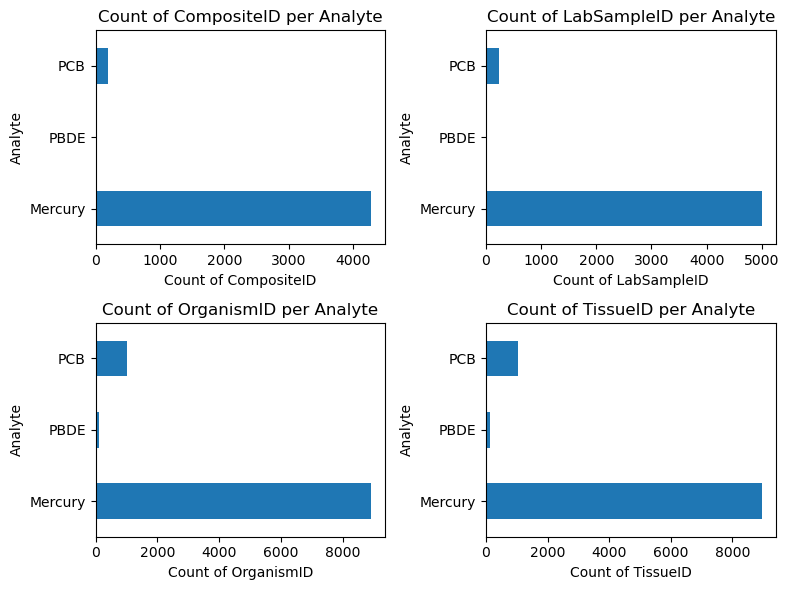

In [186]:
ID_col = ['CompositeID', 'LabSampleID', 'OrganismID', 'TissueID']
plt.subplots(2, 2, figsize=(8,6))

for i, col in enumerate(ID_col, 1):
    plt.subplot(2, 2, i)
    df.groupby('Analyte')[col].nunique().plot(kind='barh')
    plt.title(f'Count of {col} per Analyte')
    plt.xlabel(f'Count of {col}')
plt.tight_layout()

plt.show()


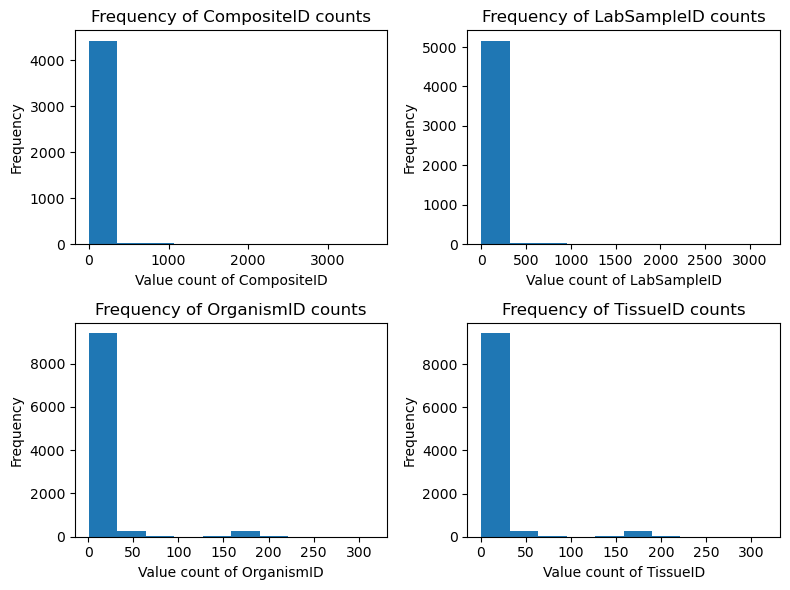

In [187]:
ID_col = ['CompositeID', 'LabSampleID', 'OrganismID', 'TissueID']
plt.subplots(2, 2, figsize=(8,6))

for i, col in enumerate(ID_col, 1):
    plt.subplot(2, 2, i)
    df.groupby('Analyte')[col].value_counts().plot(kind='hist')
    plt.title(f'Frequency of {col} counts')
    plt.xlabel(f'Value count of {col}')
plt.tight_layout()

plt.show()

Both Composite ID and Lap Sample ID represents the the analytes well. We can drop them.

In [188]:
df.drop(['CompositeID', 'LabSampleID'], inplace=True, axis=1)

In [189]:
#Looking into this column since I am curious
df['ResultReplicate'].value_counts() 

ResultReplicate
1.0    86322
2.0     5712
Name: count, dtype: int64

In [190]:
#It's a binary value column that doesn't tell us much. It is to indicate if results is a replicate or not
df.drop(columns=['ResultReplicate'], inplace=True)

### Exploring The Target Variables 

Since my target is to predict the level of bioacculumating analytes within marine organisms, based on locations, let's focus on the columns related to these values. For now, I have set the Organism ID as the unique identifier for each organisms. Since there is 9142 Organism ID in the dataset, there is truly 9142 unique samples despite the large amount of rows.

In [79]:
df['OrganismID'].nunique()

9142

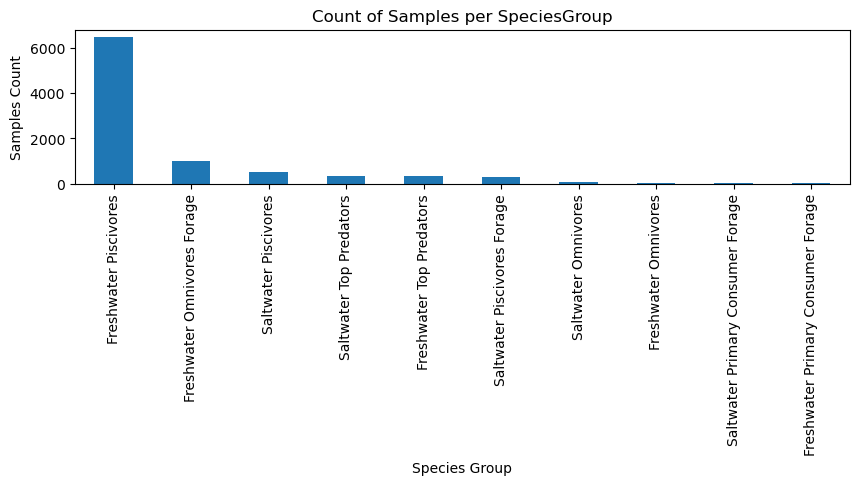

In [191]:
#Grouping species group and organism ID to see how many counts of samples we have per species group

df.groupby(['SpeciesGroup'])['OrganismID'].nunique().sort_values(ascending= False).plot(kind='bar',figsize=(10,2))
plt.title('Count of Samples per SpeciesGroup')
plt.ylabel('Samples Count')
plt.xlabel('Species Group')
plt.show()#

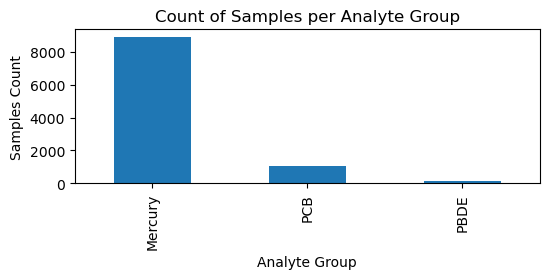

In [193]:
#Grouping Analyte and organism ID to see how many counts of samples we have per Analyte


df.groupby(['Analyte'])['OrganismID'].nunique().sort_values(ascending= False).plot(kind='bar',figsize=(6,2))
plt.title('Count of Samples per Analyte Group')
plt.ylabel('Samples Count')
plt.xlabel('Analyte Group')
plt.show()

In [88]:
#This shows the exact number of what the graph above is showing

Organism_Count= df.groupby(['Analyte'])['OrganismID'].nunique()
Organism_Count

Analyte
Mercury    8930
PBDE        119
PCB        1026
Name: OrganismID, dtype: int64

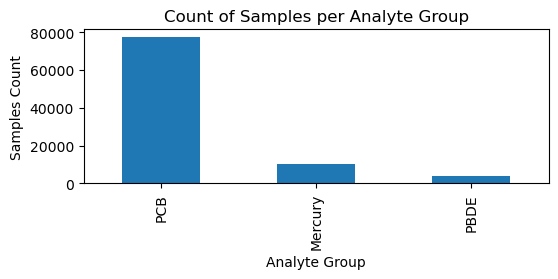

In [195]:
#Getting value counts of Analyte to see how many row counts each analyte group has

df['Analyte'].value_counts().plot(kind='bar',figsize=(6,2))
plt.title('Count of Samples per Analyte Group')
plt.ylabel('Samples Count')
plt.xlabel('Analyte Group')
plt.show()#

This is very interesting that overall, PCB has more row counts. But when you group it by analytes and the see how many unique samples there are for each analytes, Mercury has significantly more. what this tells me is that most of the unique organism with a mercury recording only has one row of entry, while each unique organism with a PCB recording has multiple rows of entry. This makes sense since the dataset had many different subtypes of PCB, but I have grouped them all together.

Now let's look at the Result column itself...

In [86]:
df.groupby(['OrganismID'])['Result'].nunique().sum()


52065

In [87]:
df.groupby(['TissueID'])['Result'].nunique().sum()


52067

In [89]:
Result_sum = df.groupby(['Analyte'])['Result'].sum()
Result_sum

Analyte
Mercury       195.701321
PBDE         5226.349000
PCB        133132.264007
Name: Result, dtype: float64

In [90]:
Result_mean = Result_sum/Organism_Count
Result_mean

Analyte
Mercury      0.021915
PBDE        43.918899
PCB        129.758542
dtype: float64

In [91]:
df.groupby('SpeciesGroup')['Analyte'].value_counts()

SpeciesGroup                        Analyte
Freshwater Omnivores                Mercury       66
Freshwater Omnivores Forage         PCB         4324
                                    Mercury     1135
Freshwater Piscivores               PCB        31101
                                    Mercury     7433
Freshwater Primary Consumer Forage  Mercury       24
Freshwater Top Predators            PCB         2595
                                    Mercury      387
Saltwater Omnivores                 PCB         4461
                                    PBDE         150
                                    Mercury       71
Saltwater Piscivores                PCB        13639
                                    PBDE        1800
                                    Mercury      584
Saltwater Piscivores Forage         PCB        16994
                                    PBDE        1380
                                    Mercury      285
Saltwater Primary Consumer Forage   PCB         1834
  

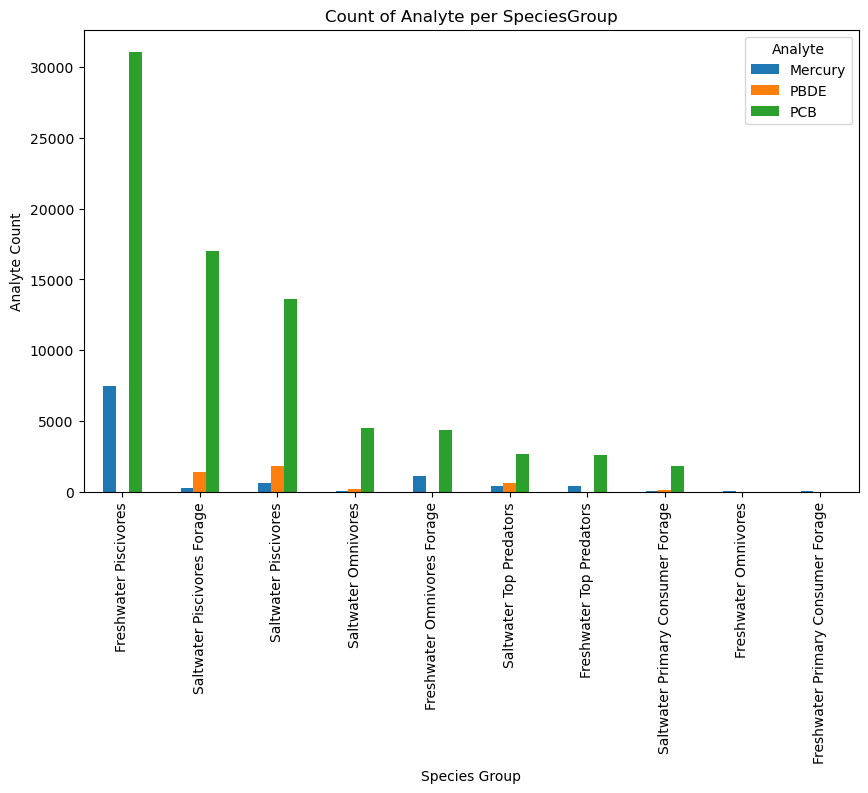

In [92]:
df.groupby(['SpeciesGroup', 'Analyte'])['Result'].count().unstack().sort_values('PCB',ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('Count of Analyte per SpeciesGroup')
plt.ylabel('Analyte Count')
plt.xlabel('Species Group')
plt.show()

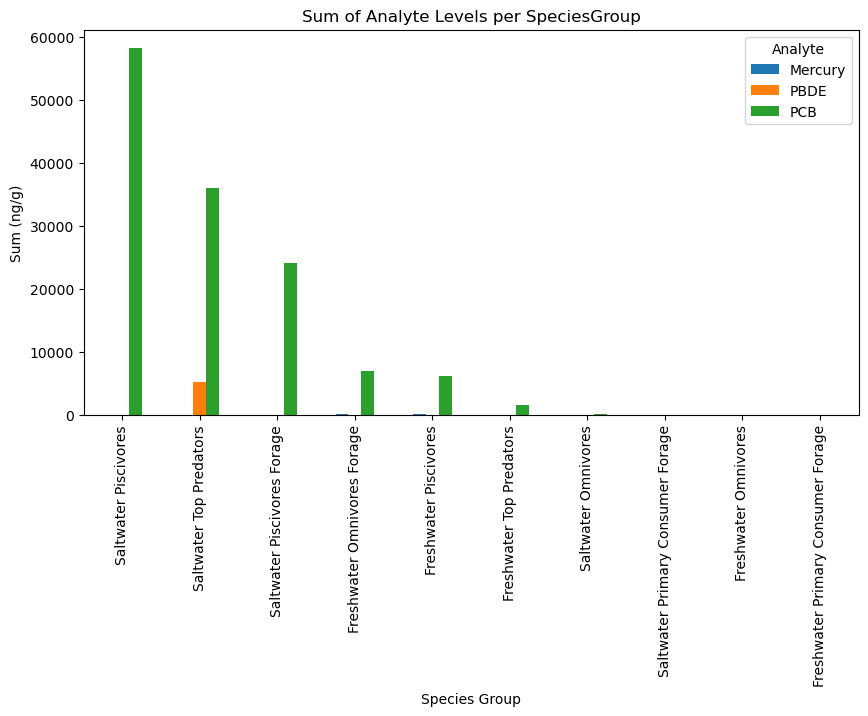

In [93]:
df.groupby(['SpeciesGroup', 'Analyte'])['Result'].sum().unstack().sort_values('PCB',ascending=False).plot(kind='bar',figsize=(10,5))
plt.title('Sum of Analyte Levels per SpeciesGroup')
plt.ylabel('Sum (ng/g)')
plt.xlabel('Species Group')
plt.show()

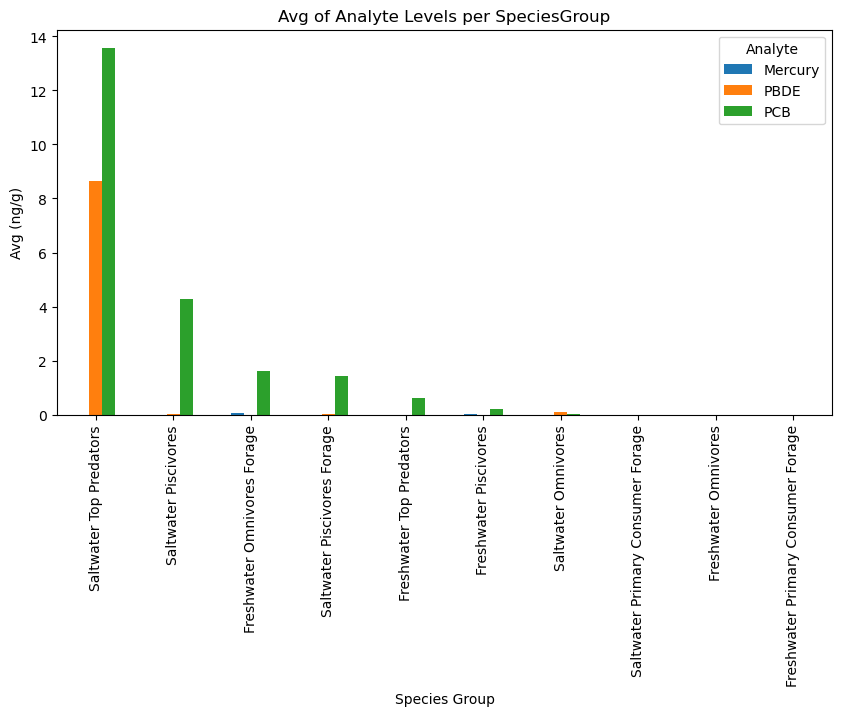

In [94]:
df.groupby(['SpeciesGroup', 'Analyte'])['Result'].mean().unstack().sort_values('PCB',ascending=False).plot(kind='bar',figsize=(10,5))
plt.title('Avg of Analyte Levels per SpeciesGroup')
plt.ylabel('Avg (ng/g)')
plt.xlabel('Species Group')
plt.show()

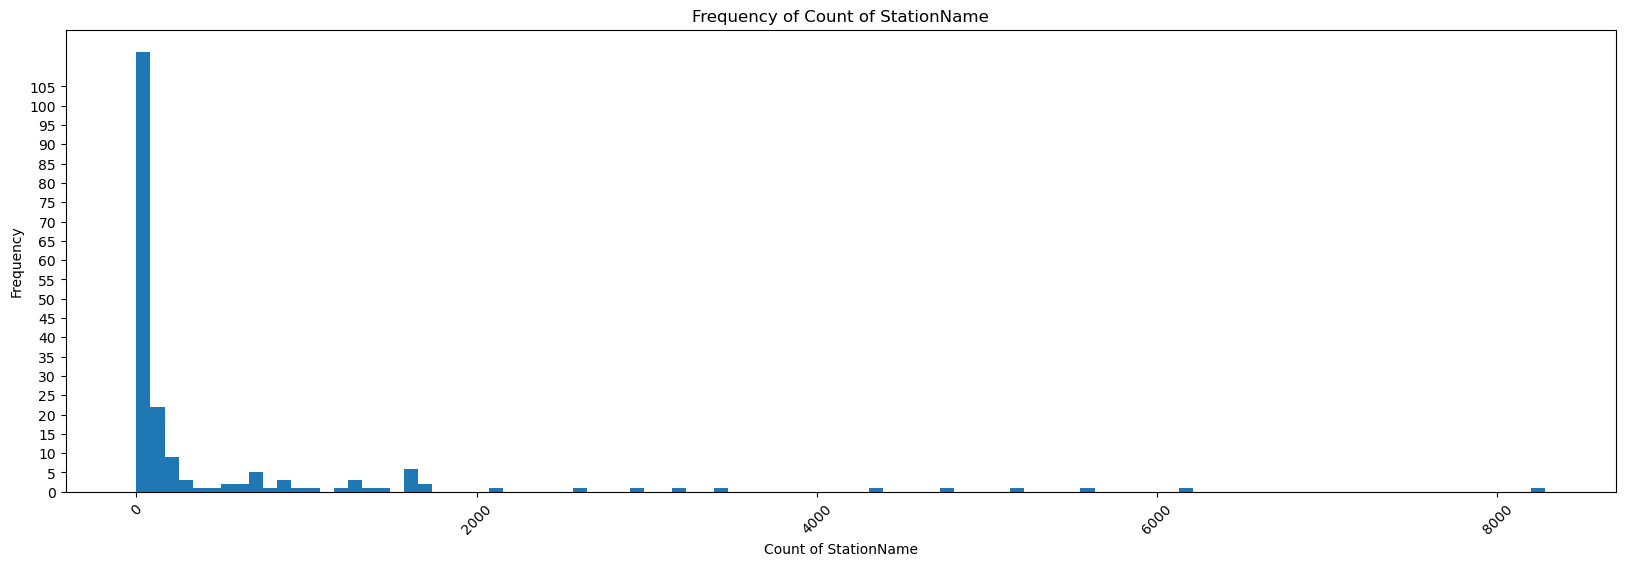

In [95]:
df['StationName'].value_counts().plot(kind='hist',bins=100, figsize=(20,6))
plt.title('Frequency of Count of StationName')
plt.xlabel('Count of StationName')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,110,step=5))
plt.show()

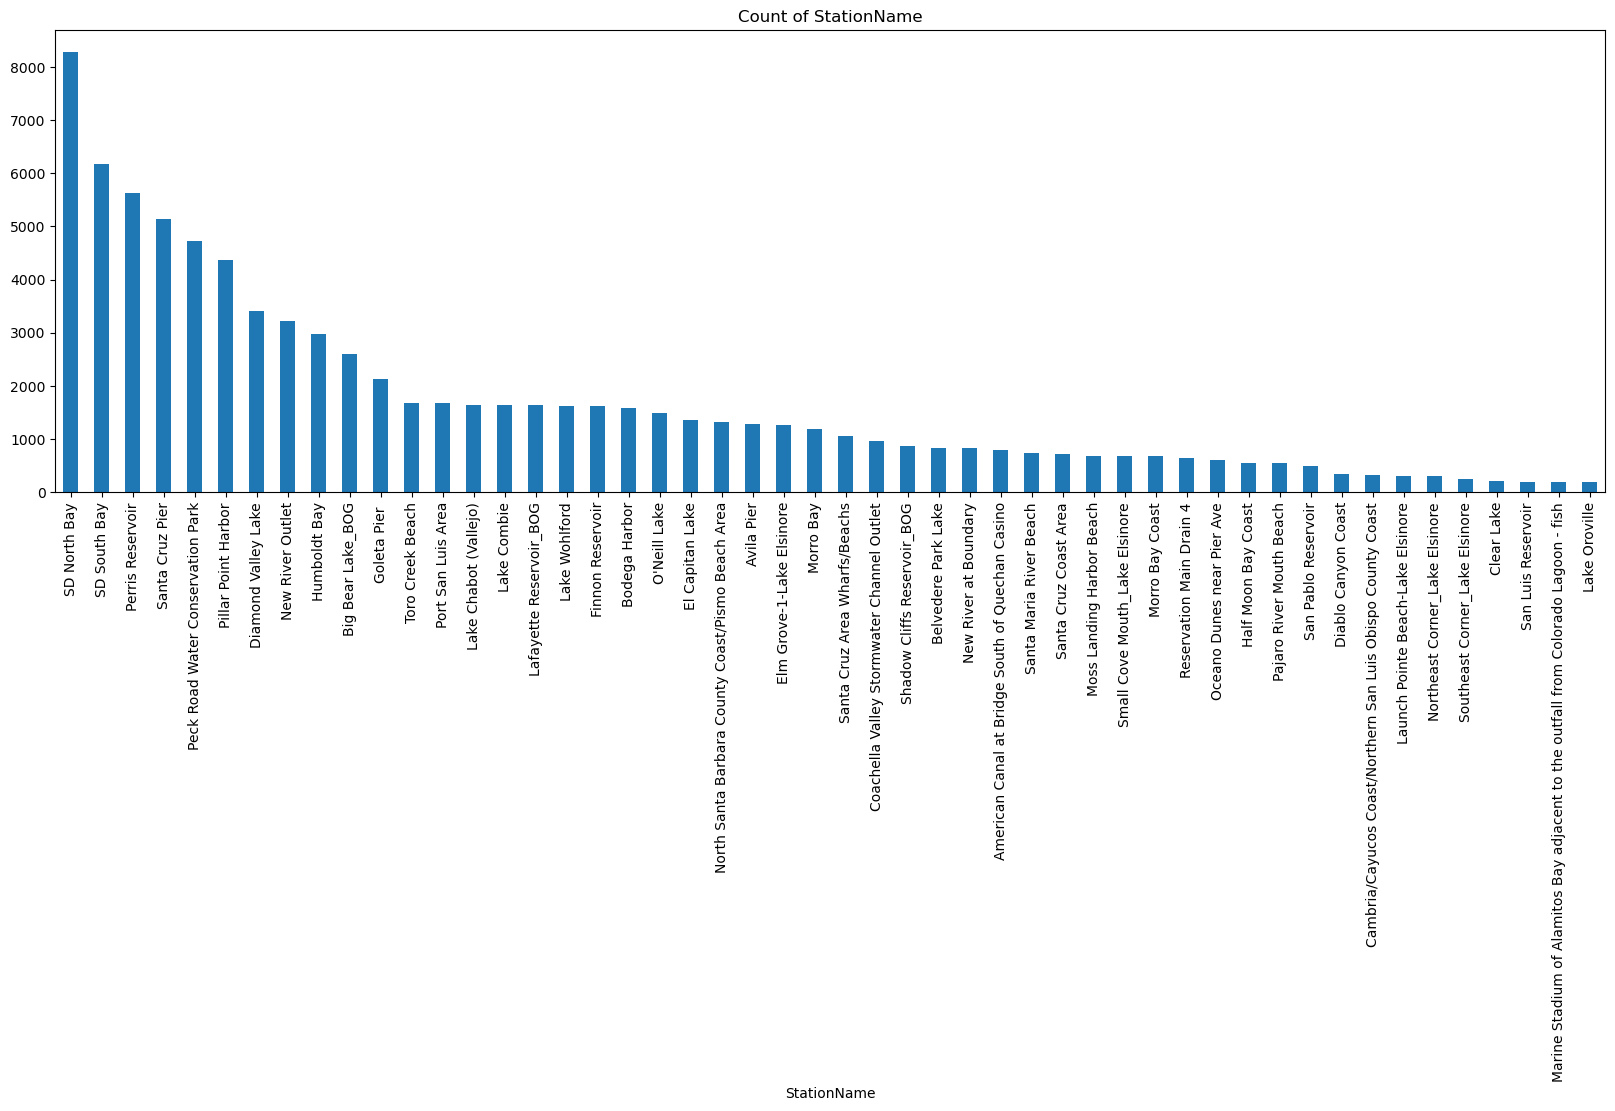

In [96]:
df['StationName'].value_counts().nlargest(50).plot(kind='bar', figsize=(20,6))
plt.title('Count of StationName')
plt.xlabel('StationName')
plt.show()

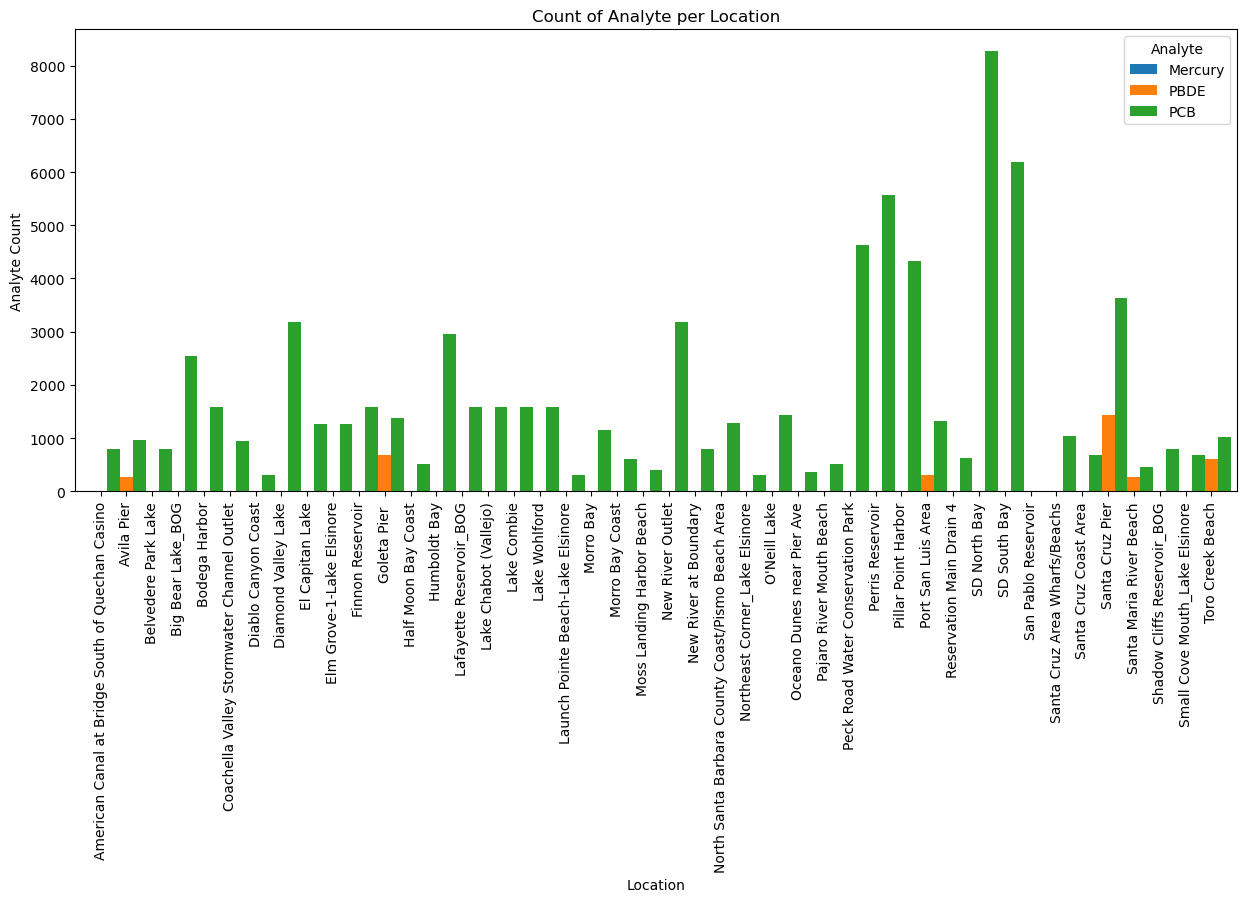

In [97]:
df.groupby(['StationName', 'Analyte'])['Result'].count().nlargest(50).unstack().plot(kind='bar',figsize=(15,6),width=1.5)
plt.title('Count of Analyte per Location')
plt.ylabel('Analyte Count')
plt.xlabel('Location')
plt.show()

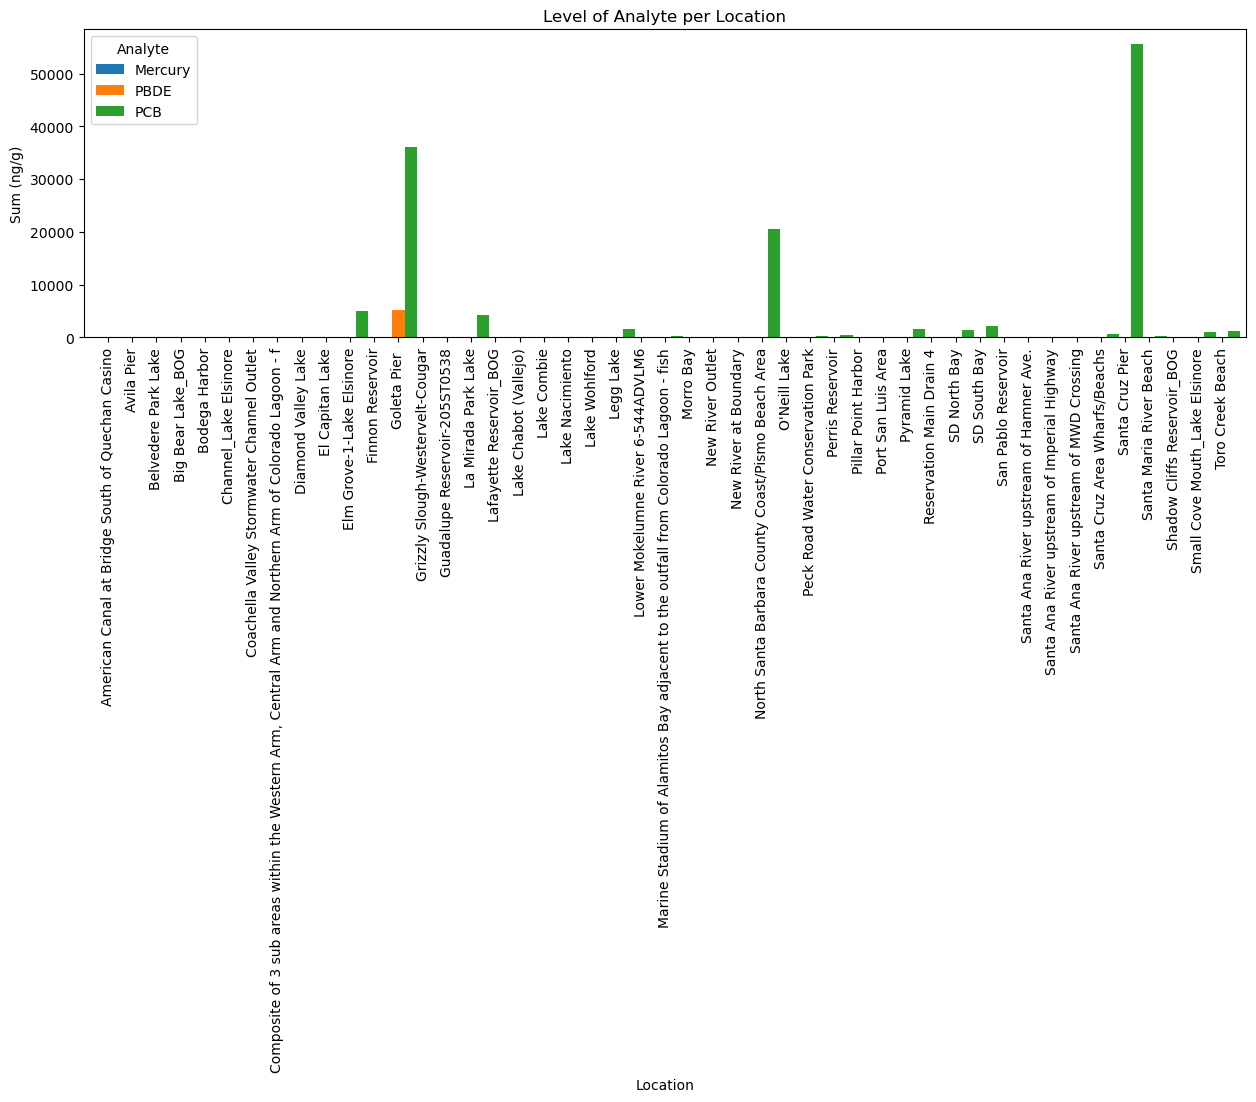

In [98]:
df.groupby(['StationName', 'Analyte'])['Result'].sum().nlargest(50).unstack().plot(kind='bar',figsize=(15,4),width=1.5)
plt.title('Level of Analyte per Location')
plt.ylabel('Sum (ng/g)')
plt.xlabel('Location')
plt.show()

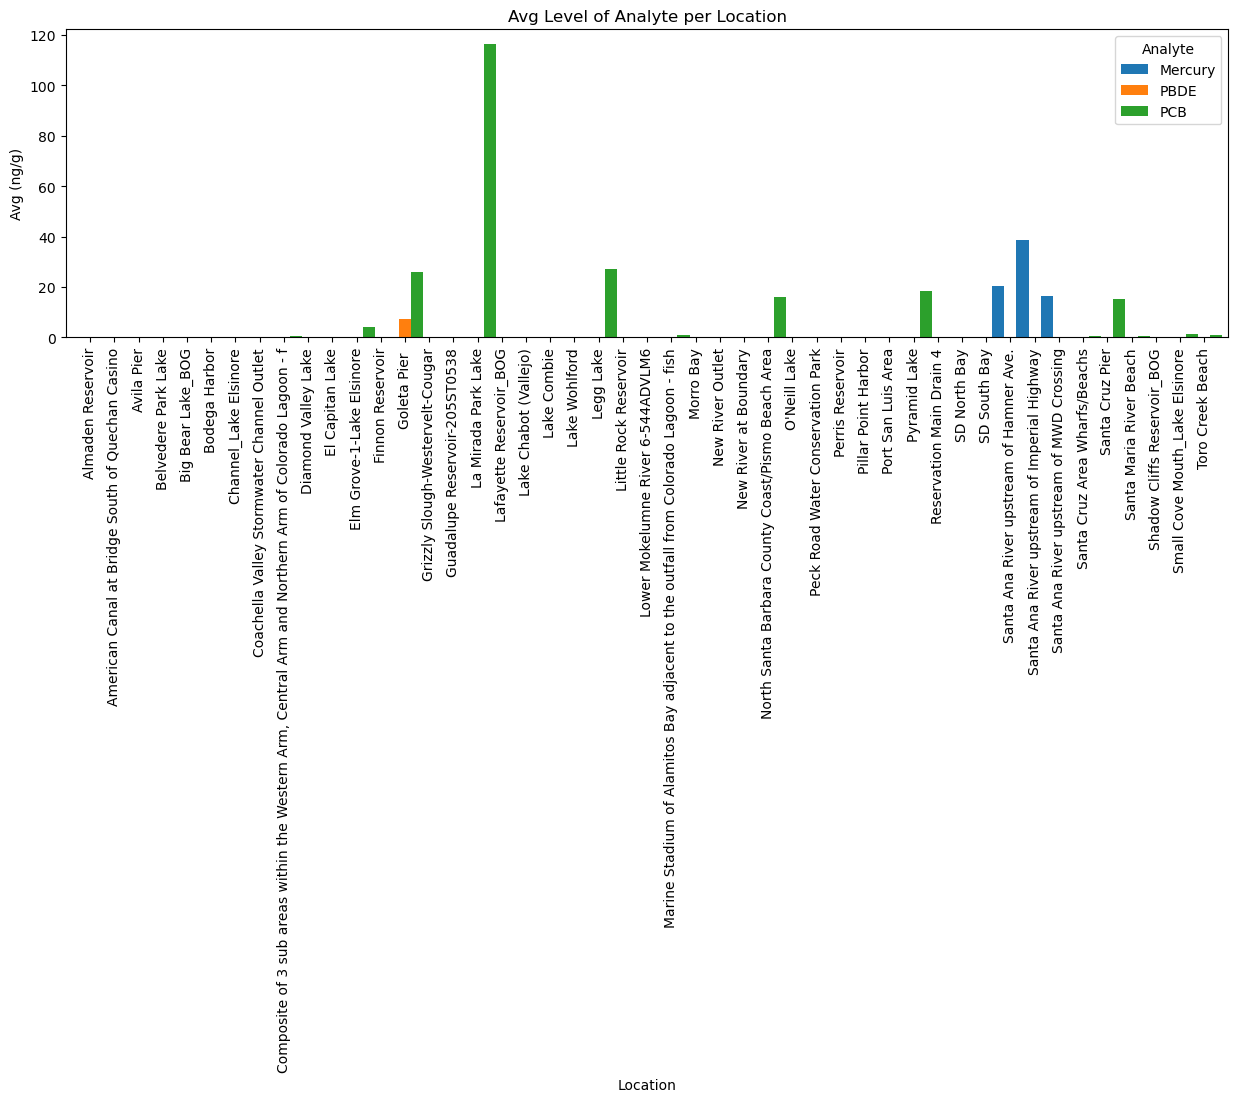

In [99]:
df.groupby(['StationName', 'Analyte'])['Result'].mean().nlargest(50).unstack().plot(kind='bar',figsize=(15,4),width=1.5)
plt.title('Avg Level of Analyte per Location')
plt.ylabel('Avg (ng/g)')
plt.xlabel('Location')
plt.show()

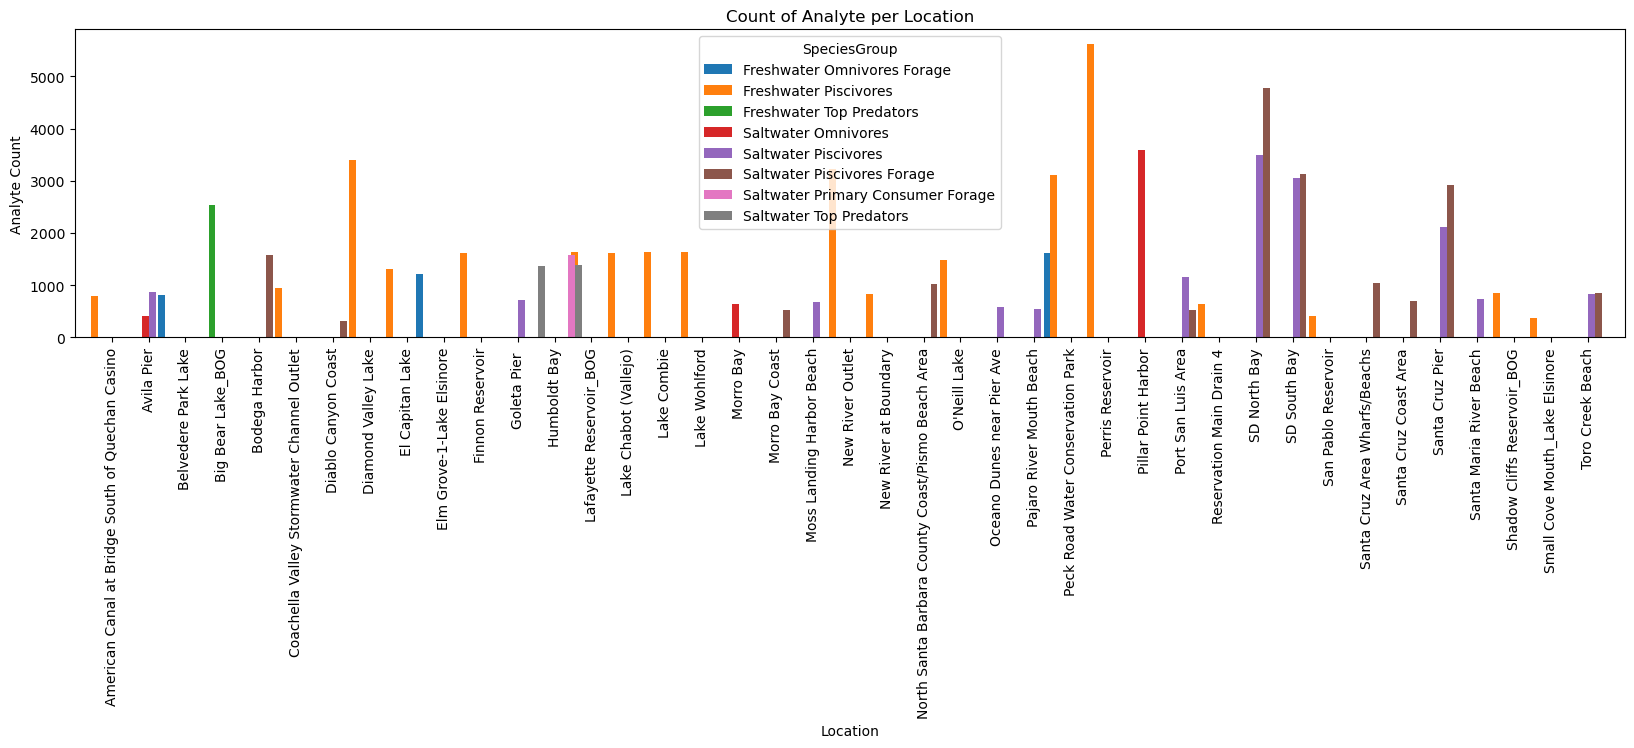

In [100]:
df.groupby(['StationName', 'SpeciesGroup'])['SpeciesGroup'].value_counts().nlargest(50).unstack().plot(kind='bar',figsize=(20,4), width=1.5)
plt.title('Count of Analyte per Location')
plt.ylabel('Analyte Count')
plt.xlabel('Location')
plt.show()

For the purpose of modeling, the target variable would be PCB levels since the other analytes shows an uneven distribution. To avoid colinaritiy, as well as to be able to demonstrate the 1:1 relationship

In [101]:
PCB_df = df.drop(df[df['Analyte']== 'Mercury'].index)
PCB_df.drop(df[df['Analyte']== 'PBDE'].index, inplace= True)
PCB_df.head()

,ProjectName,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,SampleTypeCode,CompositeReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompositeLatitude,CompositeLongitude,OrganismID,TotalLength(mm),OrganismWeight(g),Sex,TissueID,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm),PCBResult(ng/g ww),MercuryResult(ng/g ww),PBDEResult(ng/g ww),SpeciesGroup
0,City of Long Beach Colorado Lagoon TMDL Monito...,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,Composite,1.0,PCB,ng/g ww,0.0,Fish,35.5625,10.6,10.6,33.7716,-118.133,F1-190709,1.06,-88.0,NR,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,35.5625,35.5625,Saltwater Piscivores Forage
1,City of Long Beach Colorado Lagoon TMDL Monito...,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,Composite,1.0,PCB,ng/g ww,0.0,Fish,35.5625,10.6,10.6,33.7716,-118.133,F1-190709,1.06,-88.0,NR,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,35.5625,35.5625,Saltwater Piscivores Forage
2,City of Long Beach Colorado Lagoon TMDL Monito...,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,Composite,1.0,PCB,ng/g ww,0.0,Fish,35.5625,10.6,10.6,33.7716,-118.133,F1-190709,1.06,-88.0,NR,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,35.5625,35.5625,Saltwater Piscivores Forage
3,City of Long Beach Colorado Lagoon TMDL Monito...,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,Composite,1.0,PCB,ng/g ww,0.0,Fish,35.5625,10.6,10.6,33.7716,-118.133,F1-190709,1.06,-88.0,NR,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,35.5625,35.5625,Saltwater Piscivores Forage
4,City of Long Beach Colorado Lagoon TMDL Monito...,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,Composite,1.0,PCB,ng/g ww,0.0,Fish,35.5625,10.6,10.6,33.7716,-118.133,F1-190709,1.06,-88.0,NR,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,35.5625,35.5625,Saltwater Piscivores Forage


In [102]:
PCB_df['SpeciesGroup'].unique()

array(['Saltwater Piscivores Forage', 'Freshwater Piscivores',
       'Freshwater Omnivores Forage', 'Freshwater Top Predators',
       'Saltwater Piscivores', 'Saltwater Omnivores',
       'Saltwater Top Predators', 'Saltwater Primary Consumer Forage'],
      dtype=object)

In [103]:
PCB_df.shape

(77603, 34)

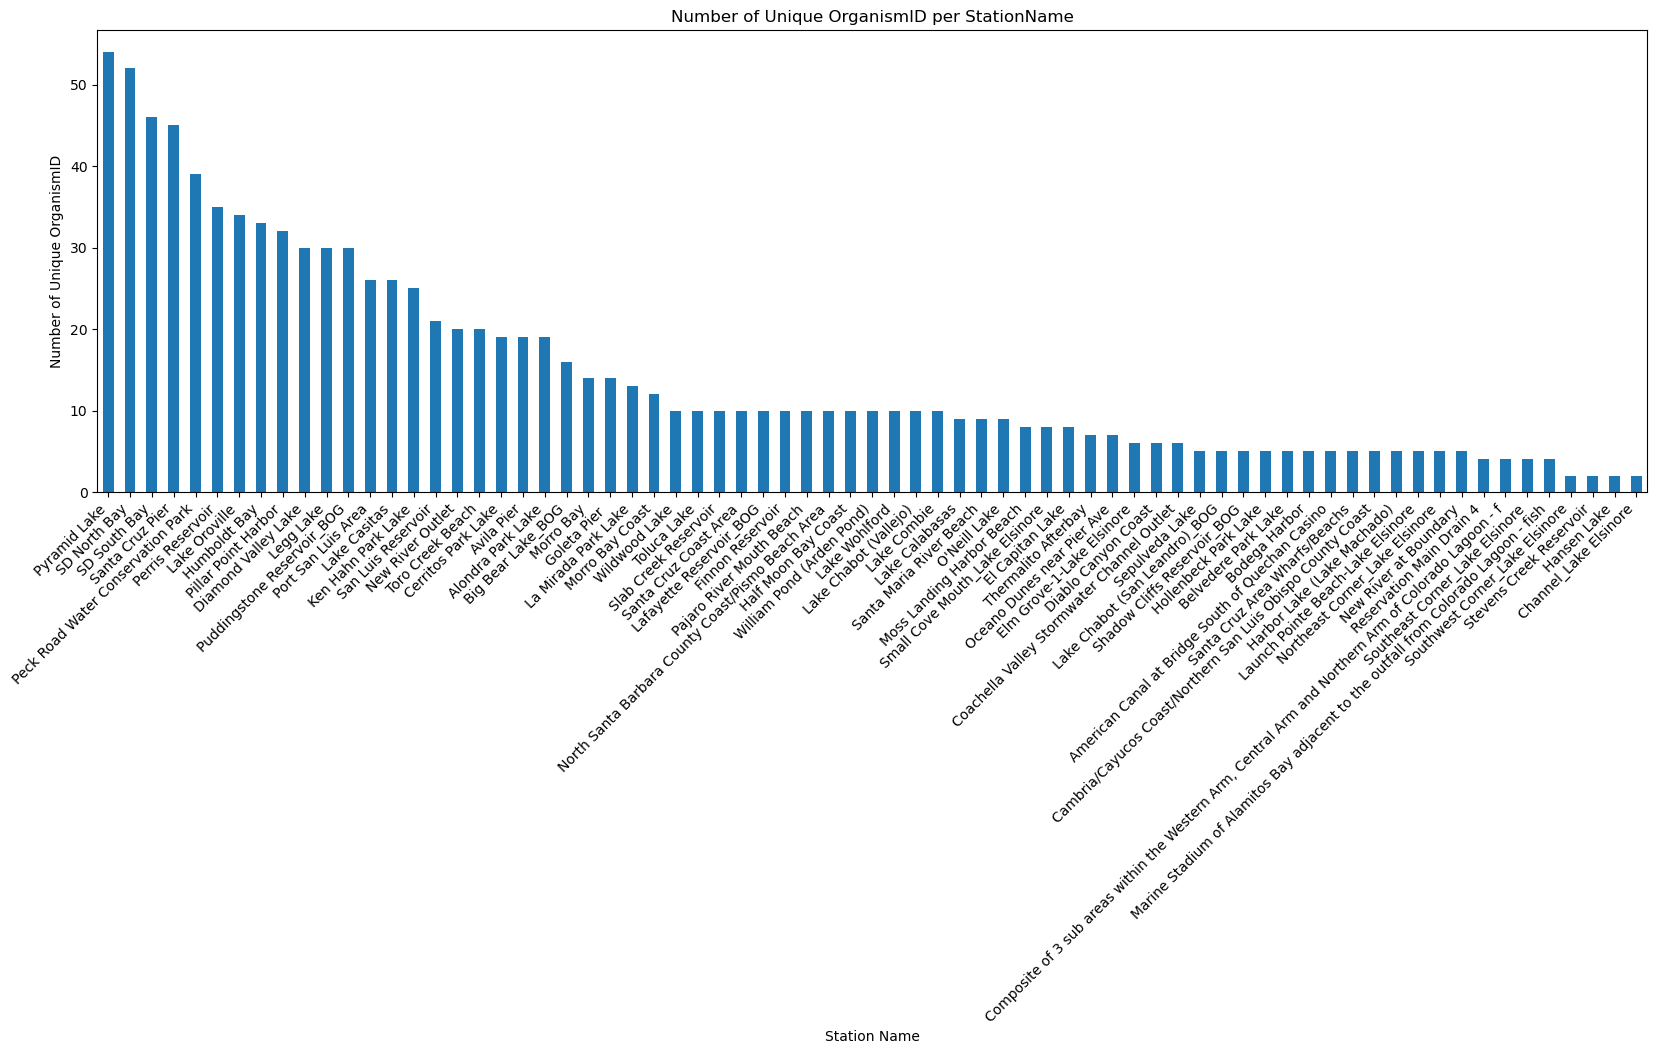

In [104]:

organism_counts_per_station = PCB_df.groupby('StationName')['OrganismID'].nunique()
organism_counts_per_station.sort_values(ascending=False).plot(kind='bar', figsize=(20, 6))
plt.title('Number of Unique OrganismID per StationName')
plt.xlabel('Station Name')
plt.ylabel('Number of Unique OrganismID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [105]:
value_counts = PCB_df['StationName'].value_counts()
value_counts

StationName
SD North Bay                         8268
SD South Bay                         6185
Perris Reservoir                     5565
Peck Road Water Conservation Park    4621
Pillar Point Harbor                  4335
                                     ... 
Lake Chabot (San Leandro)_BOG           5
Harbor Lake (Lake Machado)              5
Sepulveda Lake                          5
Stevens Creek Reservoir                 2
Hansen Lake                             2
Name: count, Length: 71, dtype: int64

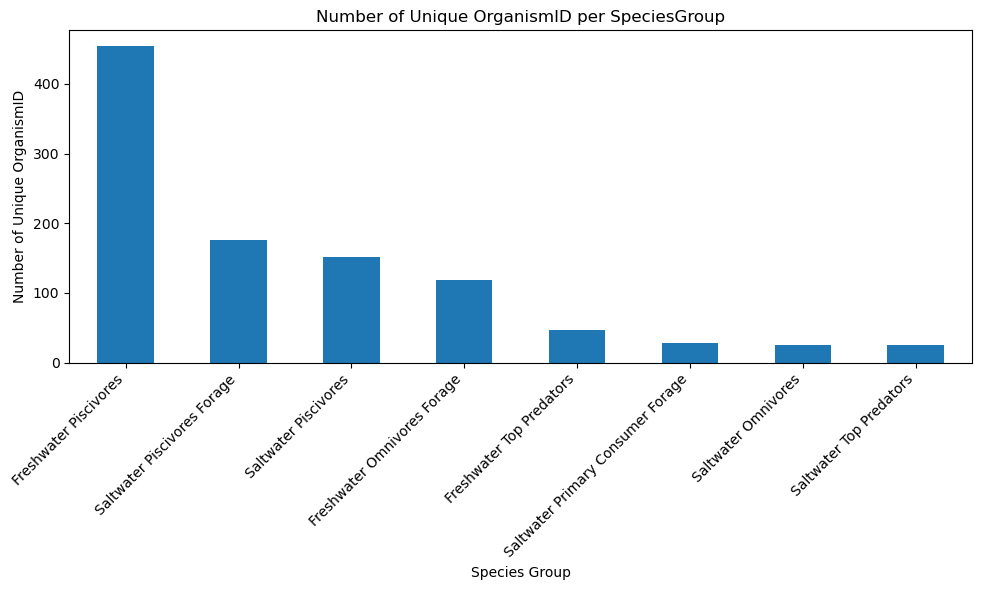

In [106]:
organism_counts_per_species= PCB_df.groupby('SpeciesGroup')['OrganismID'].nunique()
organism_counts_per_species.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Number of Unique OrganismID per SpeciesGroup')
plt.xlabel('Species Group')
plt.ylabel('Number of Unique OrganismID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [107]:
PCB_Organism_Count = PCB_df['OrganismID'].nunique()
PCB_Organism_Count

1026

In [108]:
PCB_Tissue_Count = PCB_df['TissueID'].nunique()
PCB_Tissue_Count

1026

In [109]:
PCB_result = PCB_df.groupby('OrganismID')['Result'].sum()
PCB_result

OrganismID
11064HUMBBOG19WHS01-01    0.0
11064HUMBBOG19WHS01-02    0.0
11064HUMBBOG19WHS01-03    0.0
11064HUMBBOG19WHS01-04    0.0
11064HUMBBOG19WHS01-05    0.0
                         ... 
SE1_Lepomis_2             0.0
SE1_Lepomis_3             0.0
SE1_Lepomis_4             0.0
SW1_Lepomis_1             0.0
SW1_Lepomis_2             0.0
Name: Result, Length: 1026, dtype: float64

In [110]:
PCB_result.mean()

129.758541917154

In [111]:
PCB_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77603 entries, 0 to 77602
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProjectName             77603 non-null  object 
 1   StationName             77603 non-null  object 
 2   StationCode             77603 non-null  object 
 3   Latitude                77603 non-null  float64
 4   Longitude               77603 non-null  float64
 5   GeometryShape           77603 non-null  object 
 6   EarliestDateSampled     77603 non-null  object 
 7   CompositeType           77603 non-null  object 
 8   CommonName              77603 non-null  object 
 9   TissueName              77603 non-null  object 
 10  SampleTypeCode          77603 non-null  object 
 11  CompositeReplicate      77603 non-null  float64
 12  Analyte                 77603 non-null  object 
 13  Unit                    77603 non-null  object 
 14  Result                  77603 non-null  flo

In [112]:

result_columns = ['MercuryResult(ng/g ww)', 'PBDEResult(ng/g ww)']
PCB_df.drop(columns=result_columns, inplace=True)


In [113]:
Obj_col = [col for col in df.columns if df[col].dtype == 'object']
Obj_col

['ProjectName',
 'StationName',
 'StationCode',
 'GeometryShape',
 'EarliestDateSampled',
 'CompositeType',
 'CommonName',
 'TissueName',
 'SampleTypeCode',
 'Analyte',
 'Unit',
 'OrganismGroup',
 'OrganismID',
 'Sex',
 'TissueID',
 'HomogonizedDate',
 'SpeciesGroup']

In [114]:
Obj_col_drop = ['ProjectName',
 'StationCode',
 'GeometryShape',
 'CompositeType',
 'TissueName',
 'SampleTypeCode',
 'Analyte',
 'Unit',
 'OrganismGroup',
 'Sex',
 'HomogonizedDate',
  'CompositeReplicate']
PCB_df.drop(columns=Obj_col_drop, inplace=True)

In [115]:
PCB_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77603 entries, 0 to 77602
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StationName          77603 non-null  object 
 1   Latitude             77603 non-null  float64
 2   Longitude            77603 non-null  float64
 3   EarliestDateSampled  77603 non-null  object 
 4   CommonName           77603 non-null  object 
 5   Result               77603 non-null  float64
 6   WeightAvg(g)         77603 non-null  float64
 7   TLMax(mm)            77603 non-null  float64
 8   TLAvgLength(mm)      77603 non-null  float64
 9   CompositeLatitude    77603 non-null  float64
 10  CompositeLongitude   77603 non-null  float64
 11  OrganismID           77603 non-null  object 
 12  TotalLength(mm)      77603 non-null  float64
 13  OrganismWeight(g)    77603 non-null  float64
 14  TissueID             77603 non-null  object 
 15  TissueWeight(g)      77603 non-null  floa

In [116]:

PCB_result = PCB_df.groupby('OrganismID')['PCBResult(ng/g ww)'].sum()

PCB_df['PCB_Result/Organism'] = PCB_df['OrganismID'].map(PCB_result)


In [117]:
PCB_df['PCB_Result/Organism'].nunique()

117

In [118]:

# Create a mapping of unique OrganismID values to unique numbers
unique_organism_ids = PCB_df['OrganismID'].unique()
organism_id_mapping = {organism_id: i for i, organism_id in enumerate(unique_organism_ids)}

# Create a new column with the unique numbers
PCB_df.insert(0, 'OrganismID_Number', PCB_df['OrganismID'].map(organism_id_mapping))

# Display the DataFrame with the new column
PCB_df.head()

,OrganismID_Number,StationName,Latitude,Longitude,EarliestDateSampled,CommonName,Result,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompositeLatitude,CompositeLongitude,OrganismID,TotalLength(mm),OrganismWeight(g),TissueID,TissueWeight(g),CompositeWeight(g),TLMin(mm),PCBResult(ng/g ww),SpeciesGroup,PCB_Result/Organism
0,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,07/09/2019,Top Smelt,0.0,35.5625,10.6,10.6,33.7716,-118.133,F1-190709,1.06,-88.0,30083058,-88.0,-88.0,10.6,0.0,Saltwater Piscivores Forage,15.88
1,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,07/09/2019,Top Smelt,0.0,35.5625,10.6,10.6,33.7716,-118.133,F1-190709,1.06,-88.0,30083058,-88.0,-88.0,10.6,0.0,Saltwater Piscivores Forage,15.88
2,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,07/09/2019,Top Smelt,0.0,35.5625,10.6,10.6,33.7716,-118.133,F1-190709,1.06,-88.0,30083058,-88.0,-88.0,10.6,0.0,Saltwater Piscivores Forage,15.88
3,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,07/09/2019,Top Smelt,0.0,35.5625,10.6,10.6,33.7716,-118.133,F1-190709,1.06,-88.0,30083058,-88.0,-88.0,10.6,0.0,Saltwater Piscivores Forage,15.88
4,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,07/09/2019,Top Smelt,0.0,35.5625,10.6,10.6,33.7716,-118.133,F1-190709,1.06,-88.0,30083058,-88.0,-88.0,10.6,0.0,Saltwater Piscivores Forage,15.88


In [119]:
PCB_df['OrganismID_Number'].nunique()

1026

In [120]:
PCB_df.drop(columns=['Result'], inplace=True)

In [121]:
PCB_df.drop(columns=['TissueID'], inplace=True)

In [122]:
PCB_df.duplicated().sum()

36325

In [123]:


duplicated_rows = PCB_df[PCB_df.duplicated()]
duplicated_rows

,OrganismID_Number,StationName,Latitude,Longitude,EarliestDateSampled,CommonName,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompositeLatitude,CompositeLongitude,OrganismID,TotalLength(mm),OrganismWeight(g),TissueWeight(g),CompositeWeight(g),TLMin(mm),PCBResult(ng/g ww),SpeciesGroup,PCB_Result/Organism
1,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,07/09/2019,Top Smelt,35.562500,10.6,10.600000,33.7716,-118.133,F1-190709,1.06,-88.0,-88.00,-88.00,10.6,0.0,Saltwater Piscivores Forage,15.88
2,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,07/09/2019,Top Smelt,35.562500,10.6,10.600000,33.7716,-118.133,F1-190709,1.06,-88.0,-88.00,-88.00,10.6,0.0,Saltwater Piscivores Forage,15.88
3,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,07/09/2019,Top Smelt,35.562500,10.6,10.600000,33.7716,-118.133,F1-190709,1.06,-88.0,-88.00,-88.00,10.6,0.0,Saltwater Piscivores Forage,15.88
4,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,07/09/2019,Top Smelt,35.562500,10.6,10.600000,33.7716,-118.133,F1-190709,1.06,-88.0,-88.00,-88.00,10.6,0.0,Saltwater Piscivores Forage,15.88
5,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,07/09/2019,Top Smelt,35.562500,10.6,10.600000,33.7716,-118.133,F1-190709,1.06,-88.0,-88.00,-88.00,10.6,0.0,Saltwater Piscivores Forage,15.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77553,976,Pyramid Lake,34.657300,-118.784570,05/20/2019,Bluegill,146.666667,220.0,182.333333,34.6573,-118.785,403PPL039L2BOG19BGL01-05,220.00,265.0,35.21,193.34,165.0,0.0,Freshwater Piscivores,0.00
77554,977,Pyramid Lake,34.657300,-118.784570,05/20/2019,Bluegill,146.666667,220.0,182.333333,34.6573,-118.785,403PPL039L1BOG19BGL01-01,188.00,125.0,35.21,193.34,165.0,0.0,Freshwater Piscivores,0.00
77555,978,Pyramid Lake,34.657300,-118.784570,05/20/2019,Bluegill,146.666667,220.0,182.333333,34.6573,-118.785,403PPL039L1BOG19BGL01-02,165.00,90.0,35.21,193.34,165.0,0.0,Freshwater Piscivores,0.00
77556,979,Pyramid Lake,34.657300,-118.784570,05/20/2019,Bluegill,146.666667,220.0,182.333333,34.6573,-118.785,403PPL039L1BOG19BGL01-03,165.00,90.0,35.21,193.34,165.0,0.0,Freshwater Piscivores,0.00


In [124]:

#PCB_df.drop_duplicates(inplace=True)


In [125]:
PCB_df.shape

(77603, 20)

In [126]:
 PCB_df.groupby('OrganismID')['PCB_Result/Organism'].nunique().value_counts()


PCB_Result/Organism
1    1026
Name: count, dtype: int64

In [127]:

PCB_df.drop(columns=['OrganismID'], inplace=True)

In [128]:
PCB_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77603 entries, 0 to 77602
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OrganismID_Number    77603 non-null  int64  
 1   StationName          77603 non-null  object 
 2   Latitude             77603 non-null  float64
 3   Longitude            77603 non-null  float64
 4   EarliestDateSampled  77603 non-null  object 
 5   CommonName           77603 non-null  object 
 6   WeightAvg(g)         77603 non-null  float64
 7   TLMax(mm)            77603 non-null  float64
 8   TLAvgLength(mm)      77603 non-null  float64
 9   CompositeLatitude    77603 non-null  float64
 10  CompositeLongitude   77603 non-null  float64
 11  TotalLength(mm)      77603 non-null  float64
 12  OrganismWeight(g)    77603 non-null  float64
 13  TissueWeight(g)      77603 non-null  float64
 14  CompositeWeight(g)   77603 non-null  float64
 15  TLMin(mm)            77603 non-null  floa

In [129]:
#EDA Threshold = 75 ng/g ww
# Create the new column 'PCB_threshold' and initialize it with 'No'
PCB_df['PCB_threshold'] = 'No'

# Update 'PCB_threshold' to 'Yes' where 'PCB_Result/Organism' is greater than or equal to 75
PCB_df.loc[PCB_df['PCB_Result/Organism'] >= 75, 'PCB_threshold'] = 'Yes'

PCB_df.head()

,OrganismID_Number,StationName,Latitude,Longitude,EarliestDateSampled,CommonName,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompositeLatitude,CompositeLongitude,TotalLength(mm),OrganismWeight(g),TissueWeight(g),CompositeWeight(g),TLMin(mm),PCBResult(ng/g ww),SpeciesGroup,PCB_Result/Organism,PCB_threshold
0,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,07/09/2019,Top Smelt,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,Saltwater Piscivores Forage,15.88,No
1,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,07/09/2019,Top Smelt,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,Saltwater Piscivores Forage,15.88,No
2,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,07/09/2019,Top Smelt,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,Saltwater Piscivores Forage,15.88,No
3,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,07/09/2019,Top Smelt,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,Saltwater Piscivores Forage,15.88,No
4,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,07/09/2019,Top Smelt,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,Saltwater Piscivores Forage,15.88,No


In [130]:
PCB_df['PCB_threshold'].value_counts()

PCB_threshold
No     69615
Yes     7988
Name: count, dtype: int64

In [131]:

PCB_df['PCB_threshold'] = PCB_df['PCB_threshold'].map({'No': 0, 'Yes': 1})

PCB_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77603 entries, 0 to 77602
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OrganismID_Number    77603 non-null  int64  
 1   StationName          77603 non-null  object 
 2   Latitude             77603 non-null  float64
 3   Longitude            77603 non-null  float64
 4   EarliestDateSampled  77603 non-null  object 
 5   CommonName           77603 non-null  object 
 6   WeightAvg(g)         77603 non-null  float64
 7   TLMax(mm)            77603 non-null  float64
 8   TLAvgLength(mm)      77603 non-null  float64
 9   CompositeLatitude    77603 non-null  float64
 10  CompositeLongitude   77603 non-null  float64
 11  TotalLength(mm)      77603 non-null  float64
 12  OrganismWeight(g)    77603 non-null  float64
 13  TissueWeight(g)      77603 non-null  float64
 14  CompositeWeight(g)   77603 non-null  float64
 15  TLMin(mm)            77603 non-null  floa

In [132]:
PCB_df['EarliestDateSampled'].unique()


array(['07/09/2019', '02/27/2019', '10/25/2021', '11/02/2021',
       '10/27/2021', '05/11/2021', '07/06/2021', '09/15/2021',
       '08/24/2021', '06/29/2021', '08/16/2021', '05/24/2021',
       '05/25/2021', '06/15/2021', '09/29/2021', '09/22/2021',
       '06/14/2021', '06/08/2021', '07/23/2020', '02/18/2020',
       '09/29/2020', '08/10/2020', '07/15/2020', '08/26/2020',
       '07/22/2020', '07/21/2020', '07/06/2020', '07/07/2020',
       '09/03/2020', '09/14/2020', '08/05/2020', '08/31/2020',
       '09/15/2020', '11/10/2020', '11/09/2020', '11/17/2020',
       '11/11/2020', '11/16/2020', '10/06/2020', '08/18/2020',
       '08/17/2020', '07/28/2020', '07/14/2020', '07/20/2020',
       '10/14/2020', '10/15/2019', '09/24/2019', '10/10/2019',
       '09/18/2019', '09/17/2019', '11/13/2019', '12/11/2019',
       '04/17/2019', '04/16/2019', '04/15/2019', '04/30/2019',
       '05/08/2019', '05/29/2019', '05/28/2019', '05/27/2019',
       '06/13/2019', '10/21/2019', '05/22/2019', '05/20

In [133]:

PCB_df['EarliestDateSampled'] = pd.to_datetime(PCB_df['EarliestDateSampled'])

# Extract month, year, and day
PCB_df['EarliestDateSampledMonth'] = PCB_df['EarliestDateSampled'].dt.month
PCB_df['EarliestDateSampledYear'] = PCB_df['EarliestDateSampled'].dt.year
PCB_df['EarliestDateSampledDay'] = PCB_df['EarliestDateSampled'].dt.day

PCB_df.head()

,OrganismID_Number,StationName,Latitude,Longitude,EarliestDateSampled,CommonName,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompositeLatitude,CompositeLongitude,TotalLength(mm),OrganismWeight(g),TissueWeight(g),CompositeWeight(g),TLMin(mm),PCBResult(ng/g ww),SpeciesGroup,PCB_Result/Organism,PCB_threshold,EarliestDateSampledMonth,EarliestDateSampledYear,EarliestDateSampledDay
0,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,2019-07-09,Top Smelt,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,Saltwater Piscivores Forage,15.88,0,7,2019,9
1,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,2019-07-09,Top Smelt,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,Saltwater Piscivores Forage,15.88,0,7,2019,9
2,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,2019-07-09,Top Smelt,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,Saltwater Piscivores Forage,15.88,0,7,2019,9
3,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,2019-07-09,Top Smelt,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,Saltwater Piscivores Forage,15.88,0,7,2019,9
4,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,2019-07-09,Top Smelt,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,Saltwater Piscivores Forage,15.88,0,7,2019,9


In [134]:
PCB_df.drop(columns=['EarliestDateSampled'], inplace=True)

In [135]:

# Create dummy variables for 'SpeciesGroup'
species_dummies = pd.get_dummies(PCB_df['SpeciesGroup'], prefix='SpeciesGroup', drop_first=True, dtype='int')

# Concatenate dummy variables with DF
PCB_df = pd.concat([PCB_df, species_dummies], axis=1)

# Drop the original 'SpeciesGroup' column
PCB_df.drop('SpeciesGroup', axis=1, inplace=True)

PCB_df.head()

,OrganismID_Number,StationName,Latitude,Longitude,CommonName,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompositeLatitude,CompositeLongitude,TotalLength(mm),OrganismWeight(g),TissueWeight(g),CompositeWeight(g),TLMin(mm),PCBResult(ng/g ww),PCB_Result/Organism,PCB_threshold,EarliestDateSampledMonth,EarliestDateSampledYear,EarliestDateSampledDay,SpeciesGroup_Freshwater Piscivores,SpeciesGroup_Freshwater Top Predators,SpeciesGroup_Saltwater Omnivores,SpeciesGroup_Saltwater Piscivores,SpeciesGroup_Saltwater Piscivores Forage,SpeciesGroup_Saltwater Primary Consumer Forage,SpeciesGroup_Saltwater Top Predators
0,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,Top Smelt,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,15.88,0,7,2019,9,0,0,0,0,1,0,0
1,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,Top Smelt,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,15.88,0,7,2019,9,0,0,0,0,1,0,0
2,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,Top Smelt,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,15.88,0,7,2019,9,0,0,0,0,1,0,0
3,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,Top Smelt,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,15.88,0,7,2019,9,0,0,0,0,1,0,0
4,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,Top Smelt,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,15.88,0,7,2019,9,0,0,0,0,1,0,0


In [136]:
# Create dummy variables for 'SpeciesGroup'
species_dummies = pd.get_dummies(PCB_df['CommonName'], prefix='CommonName', drop_first=True, dtype='int')

# Concatenate dummy variables with DF
PCB_df = pd.concat([PCB_df, species_dummies], axis=1)

# Drop the original 'SpeciesGroup' column
PCB_df.drop('CommonName', axis=1, inplace=True)

PCB_df.head()

,OrganismID_Number,StationName,Latitude,Longitude,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompositeLatitude,CompositeLongitude,TotalLength(mm),OrganismWeight(g),TissueWeight(g),CompositeWeight(g),TLMin(mm),PCBResult(ng/g ww),PCB_Result/Organism,PCB_threshold,EarliestDateSampledMonth,EarliestDateSampledYear,EarliestDateSampledDay,SpeciesGroup_Freshwater Piscivores,SpeciesGroup_Freshwater Top Predators,SpeciesGroup_Saltwater Omnivores,SpeciesGroup_Saltwater Piscivores,SpeciesGroup_Saltwater Piscivores Forage,SpeciesGroup_Saltwater Primary Consumer Forage,SpeciesGroup_Saltwater Top Predators,CommonName_Black Perch,CommonName_Blue Catfish,CommonName_Bluegill,CommonName_Brown Rockfish,CommonName_California Corbina,CommonName_Channel Catfish,CommonName_Chinook Salmon,CommonName_Chub Mackerel,CommonName_Common Carp,CommonName_Flathead Catfish,CommonName_Jacksmelt,CommonName_Largemouth Bass,CommonName_Leopard shark,CommonName_Northern Anchovy,CommonName_Pile Surfperch,CommonName_Rainbow Trout,CommonName_Redear Sunfish,CommonName_Sacramento Sucker,CommonName_Shiner Surfperch,CommonName_Spotted Bass,CommonName_Spotted Sand Bass,CommonName_Striped Bass,CommonName_Striped Mullet,CommonName_Tilapia spp.,CommonName_Top Smelt,CommonName_Vermillion Rockfish,CommonName_White Croaker,CommonName_White Surfperch
0,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,15.88,0,7,2019,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,15.88,0,7,2019,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,15.88,0,7,2019,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,15.88,0,7,2019,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,Composite of 3 sub areas within the Western Ar...,33.771563,-118.133022,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,15.88,0,7,2019,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [137]:
PCB_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77603 entries, 0 to 77602
Data columns (total 55 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   OrganismID_Number                               77603 non-null  int64  
 1   StationName                                     77603 non-null  object 
 2   Latitude                                        77603 non-null  float64
 3   Longitude                                       77603 non-null  float64
 4   WeightAvg(g)                                    77603 non-null  float64
 5   TLMax(mm)                                       77603 non-null  float64
 6   TLAvgLength(mm)                                 77603 non-null  float64
 7   CompositeLatitude                               77603 non-null  float64
 8   CompositeLongitude                              77603 non-null  float64
 9   TotalLength(mm)                             

In [138]:
#since location of the StationName is also represented by the combination of latitude and longitude, we can drop the column for this baseline model
PCB_df.drop(columns=['StationName'], inplace=True)

In [139]:
PCB_df.reset_index(drop=True, inplace=True)

In [140]:
PCB_df.head()

,OrganismID_Number,Latitude,Longitude,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompositeLatitude,CompositeLongitude,TotalLength(mm),OrganismWeight(g),TissueWeight(g),CompositeWeight(g),TLMin(mm),PCBResult(ng/g ww),PCB_Result/Organism,PCB_threshold,EarliestDateSampledMonth,EarliestDateSampledYear,EarliestDateSampledDay,SpeciesGroup_Freshwater Piscivores,SpeciesGroup_Freshwater Top Predators,SpeciesGroup_Saltwater Omnivores,SpeciesGroup_Saltwater Piscivores,SpeciesGroup_Saltwater Piscivores Forage,SpeciesGroup_Saltwater Primary Consumer Forage,SpeciesGroup_Saltwater Top Predators,CommonName_Black Perch,CommonName_Blue Catfish,CommonName_Bluegill,CommonName_Brown Rockfish,CommonName_California Corbina,CommonName_Channel Catfish,CommonName_Chinook Salmon,CommonName_Chub Mackerel,CommonName_Common Carp,CommonName_Flathead Catfish,CommonName_Jacksmelt,CommonName_Largemouth Bass,CommonName_Leopard shark,CommonName_Northern Anchovy,CommonName_Pile Surfperch,CommonName_Rainbow Trout,CommonName_Redear Sunfish,CommonName_Sacramento Sucker,CommonName_Shiner Surfperch,CommonName_Spotted Bass,CommonName_Spotted Sand Bass,CommonName_Striped Bass,CommonName_Striped Mullet,CommonName_Tilapia spp.,CommonName_Top Smelt,CommonName_Vermillion Rockfish,CommonName_White Croaker,CommonName_White Surfperch
0,0,33.771563,-118.133022,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,15.88,0,7,2019,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,33.771563,-118.133022,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,15.88,0,7,2019,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,33.771563,-118.133022,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,15.88,0,7,2019,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,33.771563,-118.133022,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,15.88,0,7,2019,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,33.771563,-118.133022,35.5625,10.6,10.6,33.7716,-118.133,1.06,-88.0,-88.0,-88.0,10.6,0.0,15.88,0,7,2019,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [141]:
PCB_df.to_csv('PCB_df.csv')